<a href="https://colab.research.google.com/github/franklin-univ-data-science/comp411/blob/master/Module03_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 3

1. Load the Given data set fruit.csv, which contains the samples of fruit's mass, height, and name.

    https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv

    columns
    - fruit name: mandarin, apple, lemon
    - mass
    - height


2. Define the features as mass and height, and the target as the variable "isLemon", which is derived by yourself (if fruit is lemon then 1 else -1). Print the feature matrix and target vector, respectively.
3. Draw a scatter plot of the binary classification (isLemon) by two features (mass, height). 
4. Apply the Perceptron algorithm to predict the isLemon. What is the smallest number of misclassified samples you can get? (hint: try a large number of epoch because the optimization of current Perceptron method is not efficient. You will lean how to make it much efficient next week.)
5. The Perception class code in lecture notes is different from the code in the textbook in terms of the the matrix calculation. Find at least one and explain why is that.
1. In two to three paragraphs of prose (i.e. sentences, not bullet lists), summarize and interact with the content that was covered this week in readings and in class meeting. In your summary, you should highlight the major topics, methods, and practices that were covered. Your summary should also interact with the material through personal observations, reflections, and applications to the field of study. In particular, highlight what surprised, enlightened, or otherwise engaged you. In other words, you should think and write critically not just about what was presented but also what you have learned through the session. 

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv')
data

,fruit_name,mass,height
0,lemon,116,7.9
1,lemon,116,8.5
2,lemon,116,8.0
3,lemon,116,8.1
4,lemon,118,8.0
5,lemon,118,8.1
6,lemon,120,8.4
7,lemon,130,8.2
8,lemon,132,8.7
9,lemon,152,9.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np

islemon= data.iloc[0:40, 0].values
islemon = np.where(islemon == 'lemon', -1, 1)
X = data.iloc[0:40, [1, 2]].values
X

array([[116. ,   7.9],
       [116. ,   8.5],
       [116. ,   8. ],
       [116. ,   8.1],
       [118. ,   8. ],
       [118. ,   8.1],
       [120. ,   8.4],
       [130. ,   8.2],
       [132. ,   8.7],
       [152. ,   9. ],
       [174. ,  10.1],
       [186. ,   9.2],
       [194. ,  10.3],
       [196. ,   9.7],
       [200. ,  10.5],
       [216. ,  10.2],
       [140. ,   7.1],
       [152. ,   7.3],
       [154. ,   7.1],
       [156. ,   7.1],
       [156. ,   7.5],
       [156. ,   7.4],
       [160. ,   7.5],
       [162. ,   7.1],
       [162. ,   7.2],
       [164. ,   7.7],
       [166. ,   7.3],
       [168. ,   7.6],
       [170. ,   7.9],
       [172. ,   7. ],
       [172. ,   7.6],
       [176. ,   7.2],
       [178. ,   7.8],
       [180. ,   6.8],
       [192. ,   7.3],
       [ 76. ,   4. ],
       [ 80. ,   4.3],
       [ 80. ,   4.3],
       [ 84. ,   4.6],
       [ 86. ,   4.7]])

In [3]:
islemon

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

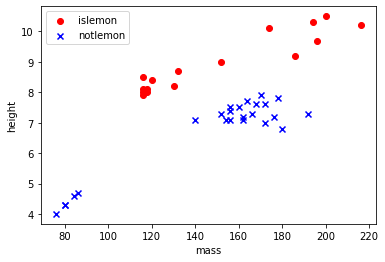

In [4]:
# plot data
plt.scatter(X[:16, 0], X[:16, 1],
            color='red', marker='o', label='islemon')
plt.scatter(X[16:40, 0], X[16:40, 1],
            color='blue', marker='x', label='notlemon')

plt.xlabel('mass')
plt.ylabel('height')
plt.legend(loc='upper left')

plt.show()

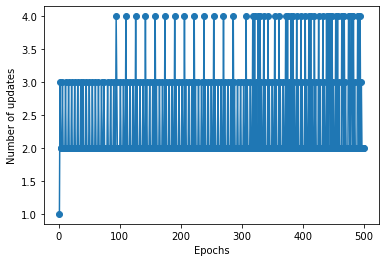

In [25]:

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, islemon):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= X.shape[1]) 
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, islemon):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        
        return X @ self.w_
    

    def predict(self, X):
       
        return np.where(self.net_input(X) >= 0.0, 1, -1)
# in X1, add x0 to feature matrix X (vector with all elements as 1)
m = islemon.size
vector_ones = np.ones(m).reshape(m, 1)
X1 = np.hstack([vector_ones, X])

ppn = Perceptron(eta=0.1, n_iter=500)

ppn.fit(X1, islemon)

plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [26]:
islemon_pred = ppn.predict(X1)

print('Misclassified samples: %d' % (islemon != islemon_pred).sum())

Misclassified samples: 16


One of the differences in the perceptron class is the def net_input. The book shows that the def would return np.dot(X, self.w_[1:] + self.w_[0]). They use this return to calculate the vector dot product (w^T)x. The code shown in the lecture has the return of X @ self.w_ which is used to show X multiplied by self.w_ which is the rgen.normal(loc=0.0, scale=0.01, size= X.shape[1]). The book specifies the two w_ in the return while the lecture does not but still has a similar outcome.

This week we continued with the Iris flower dataset and learned about the perceptron learning algorithm, artificial neurons, and gradient. The artificial neuron is set up to mimic a neuron following the steps of input signals and output signals. The input can be negative which will return a -1 while the positive would return a +1. The perceptron learning algorithm is used for a binary classification and can accept input of features and weight to determine the net input. The net input is then sent to the threshold function which will the produce the output. The gradient decent is used to help minimize the cost/value rate to find a better middle ground between the two. My question is that with the gradient decent it helps between the two, is there a type of decent that would work for three different factors? For example, is a person is doing cost, value, and time, is their a function that would fit this best? 